# Equations of turbulence -- Part 2

## Pure advection (reminder)

In Part 1, we saw that, given an initial perturbation in the form of a wave $u(x,t=0)=A\cos(kx)$, the pure advection equation
$$
\partial_tu+u\partial_xu = 0
$$
builds smaller and smaller scales over time. The nonlinear term $u\partial_xu$ creates small scales and, in the absence of any dissipative process, can create shock-like gradients.

    
The extension to dimension larger than one is straightforward,
$$
\partial_tu_i+u_j\partial_ju_i = 0
$$
and has similar dynamics.

<div class="alert alert-block alert-danger">
    Without entering in too many details, the pure advection equation is a hyperbolic equation. In fact equations of the form,
    $$
    \partial_t\phi+u_k\partial_k\phi=\frac{1}{ReSc_\phi}\partial_k\partial_k\phi
    $$
    is hyperbolic if the non-dimenionsional number $Sc_\phi\gg1$.
    </div>
    The equation is the <b>transport equation</b> of $\phi$ in a flow of Reynolds number $Re$. $Sc_\phi$ is the ratio of viscosity of the flow to molecular diffusivity of the $\phi$. In the case that $Sc_\phi\rightarrow\infty$ and/or $Re\rightarrow\infty$, the smallest scale of a flow starting with a perturbation is 0. In real life, the product $ReSc_\phi$ is finite and the smallest scale is a function of both $Re$ and $Sc_\phi$.

## Pure diffusion equation

Continuing our exploration of 1D simple equation, we turn our attention to the diffusion or dissipation term:
$$
\partial_tu=\nu\partial_x\partial_xu
$$
with two different initial conditions. The goal is to understand the physical role of this term.

### Dissipation of a single wave.

First we study the case when $u(x,t=0)=A\cos(kx)$




In [12]:
import numpy as np
import matplotlib.pyplot as plt


In [13]:
"""
Critical functions, do not modify unless you know what you are doing
"""
def init_domain(N,L):
    dx = L/N
    x = np.arange(0.0, L, L/float(N))
    if N % 2 == 0:
        k = np.asarray(range(0, N // 2))
        k = np.append(k,0)
        k = np.append(k,range(-N // 2 + 1,0))*2 * np.pi / L
    else:
        k = np.asarray(range(0,(N - 1) // 2))
        k = np.append(k,0)
        k = np.real(np.append(k,range(-(N - 1) // 2, 0)))*2 * np.pi / L

    return x,k,dx
def der_x(u,k):
    return np.real(np.fft.ifft(1.0j * k * np.fft.fft(u)))
def dder_x(u,k):
    return np.real(np.fft.ifft( -k**2 * np.fft.fft(u)))
def advection(c,u,k):
    return -c*der_x(u,k)
def diffusion(nu,u,k):
    return nu*dder_x(u,k)

def time_advancement_nonlinear_pure_advection(u0,T,dt_fixed,k,dx):
    t = 0
    CFL = 0.1
    u = np.copy(u0)
    while t < T :
        dt_cfl = CFL * dx / np.amax(u)
        dt = np.amin([dt_cfl,dt_fixed])
        if t + dt > T:
            dt = T - t
#         print(dt)
        uold = np.copy(u)
        # step 1
        u += (dt/2) * advection(uold,uold,k)
        #step 2
        u = uold + dt * advection(u,u,k)
        t += dt
    return u

def time_advancement_pure_diffusion(u0,nu,T,dt_fixed,k,dx):
    t = 0
    C_diff = 0.1
    u = np.copy(u0)
    while t < T :
        dt_diff = C_diff * dx**2 / nu
        dt = np.amin([dt_diff,dt_fixed])
        if t + dt > T:
            dt = T - t
#         print(dt)
        uold = np.copy(u)
        # step 1
        u += (dt/2) * diffusion(nu,uold,k)
        #step 2
        u = uold + dt * diffusion(nu,u,k)
        t += dt
    return u


Play with different wavelengths of the initial condition $u(x,t=0)$ and different values for the viscosity $\nu$. 
* Are the wavelength, amplitude or phase changing over time? 
* What is the solution when $t\rightarrow\infty$?

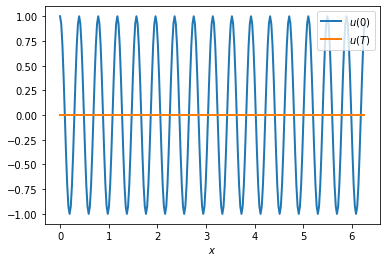

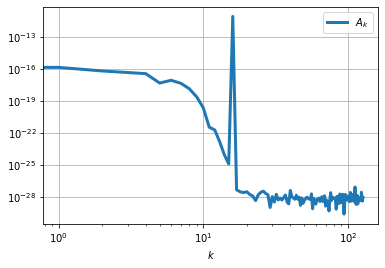

In [18]:
L = 2*np.pi
N=256
nu = 1e-1
dt = 0.001
T = 1.
A = 1. # Amplitude of the initial condition
k = 16.
phi = 0
x,kx,dx = init_domain(N,L)
""" Initial condition """
u0 = A*np.cos(k*x + phi)

""" Simulation """
u = time_advancement_pure_diffusion(u0,nu,T,dt,kx,dx)

plt.figure()
plt.plot(x,u0,lw = 2,label="$u(0)$")
plt.plot(x,u,lw = 2,label="$u(T)$")
plt.legend()
plt.xlabel("$x$")
plt.show()

Fu = np.fft.fft(u)/(N//2)
Ak = np.sqrt(np.real(Fu[0:N//2])**2+np.imag(Fu[0:N//2])**2)
plt.loglog(kx[0:N//2],Ak,lw=3,label="$A_k$")
plt.xlabel("$k$")
plt.grid(True)
plt.legend()
plt.show()

### Initial conditions with multiple scales

Turbulent flows have multiple scales. We use the solution from pure advection with a broad range of scale as initial conditions.

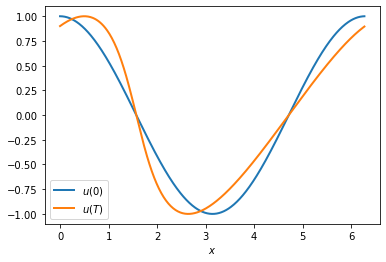

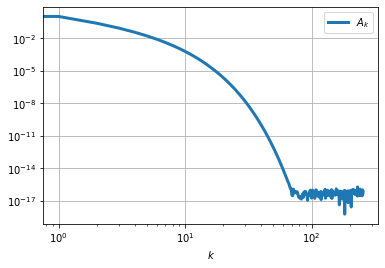

In [23]:
L = 2*np.pi
N = 512
dt = 0.001
T = 0.5
A = 1.
k = 1.
phi = 0
x,kx,dx = init_domain(N,L)
u0 = A*np.cos(k*x + phi)
u = time_advancement_nonlinear_pure_advection(u0,T,dt,kx,dx)
plt.figure()
plt.plot(x,u0,lw = 2,label="$u(0)$")
plt.plot(x,u,lw = 2,label="$u(T)$")
plt.legend()
plt.xlabel("$x$")
plt.show()

Fu = np.fft.fft(u)/(N//2)
Ak = np.sqrt(np.real(Fu[0:N//2])**2+np.imag(Fu[0:N//2])**2)
plt.loglog(kx[0:N//2],Ak,lw=3,label="$A_k$")
plt.xlabel("$k$")
plt.grid(True)
plt.legend()
plt.show()
u_advection = np.copy(u)

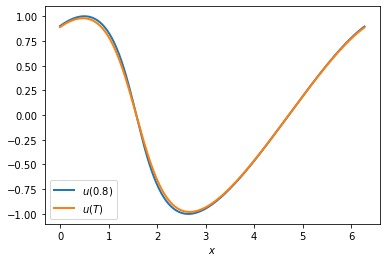

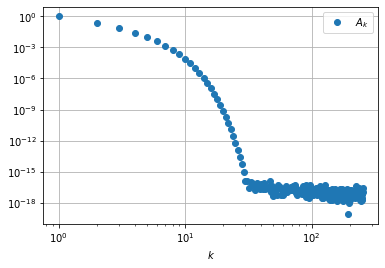

In [29]:
u0 = np.copy(u_advection)
nu = 1e-3
T = 20.
u = time_advancement_pure_diffusion(u0,nu,T,dt,kx,dx)
plt.figure()
plt.plot(x,u0,lw = 2,label="$u(0.8)$")
plt.plot(x,u,lw = 2,label="$u(T)$")
plt.legend()
plt.xlabel("$x$")
plt.show()

Fu = np.fft.fft(u)/(N//2)
Ak = np.sqrt(np.real(Fu[0:N//2])**2+np.imag(Fu[0:N//2])**2)
plt.loglog(kx[0:N//2],Ak,'o',lw=3,label="$A_k$")
plt.xlabel("$k$")
plt.grid(True)
plt.legend()
plt.show()

$$
u\partial_tu = \frac{1}{2}\partial_t u^2= \partial_t \frac{u^2}{2}=\partial_tE
$$

$$
\partial_t uv = u\partial_t v+ v\partial_t u
$$

$$
u(u\partial_xu)=u\frac{1}{2}\partial_x u^2= u\partial_xE
$$

$$
\partial_x\partial_x\frac{u^2}{2}=\partial_x\left(u\partial_xu\right)
= (\partial_x u)(\partial_x u)+u\partial_x\partial_xu
$$
$$
u\partial_x\partial_xu = \partial_x\partial_x\frac{u^2}{2} - (\partial_x u)(\partial_x u)
$$

## The advection-diffusion problem

Now it is time to bring together advection and diffusion. The tranport equation becomes:
$$
\partial_tu+u\partial_xu=\nu\partial_x\partial_xu+f
$$
where $f$ is a constant forcing of the system.

A quantity of interest is the energy $E = u^2/2$. When multiplying the above equation by $u$, it is possible to derive the transport energy equation:

$$
\partial_t E+ u\partial_xE=\nu\partial_x\partial_xE -\nu(\partial_xu)^2+uf
$$

The local temporal variation of kinetic energy is the consequence of 3 terms:
$$
\partial_t E= \underbrace{-u\partial_x E}_{\mathcal{P}}+\underbrace{\nu\partial_x\partial_xE}_\mathcal{D} -\underbrace{\nu(\partial_xu)^2}_\varepsilon+\underbrace{uf}_\mathcal{W}
$$

* $\mathcal{P}$ is the production of scales (We have seen how it produces small scales and we will see later how it can also produced large scales in 2 and 3D)
* $\mathcal{D}$ is the diffusion of kinetic energy. Its role is to eliminate small scales through molecular diffusion.
* $\varepsilon$ is the rate of dissipation of kinetic energy. It is rate at which energy is passed from one scale to a smaller scale for the problem at hand.
* $\mathcal{W}$ is the work of the forcing $f$.

The following is the solver of the equation. You should not have to modify it.

$$
\Delta t \leq \frac{C_{CFL}}{\max (\frac{|u|}{\Delta_x},\frac{|v|}{\Delta_y})}
$$
$$
\Delta t \leq \frac{C_{Diff}}{\frac{\nu}{\min(\Delta_x^2,\Delta_y^2)}}
$$

In [30]:
def time_advancement_advection_diffusion(u0,nu,T,dt_fixed,k,dx,f,Tsample):
    t = 0
    tsample = 0
    CFL = 0.1
    C_diff = 0.1
    u = np.copy(u0)
    dt_diff = C_diff * dx**2 / nu
    urms = np.array([])
    uprobe = np.array([])
    tprobe = np.array([])
    Prod = np.array([])
    Diff = np.array([])
    epsilon = np.array([])
    Work = np.array([])
    while t < T :
        if np.amax(np.abs(u)) > 0:
            dt_cfl = CFL * dx / np.amax(np.abs(u))
        else:
            dt_cfl = dt_fixed
        dt = np.amin([dt_cfl,dt_diff,dt_fixed])
        if t + dt > T:
            dt = T - t
#         print(dt)
        uold = np.copy(u)
        # step 1
        u += (dt/2) * (advection(uold,uold,k) + diffusion(nu,uold,k) + f)
        #step 2
        u = uold + dt * (advection(u,u,k) + diffusion(nu,u,k) + f)
        t += dt
        tsample += dt
        if tsample >= Tsample:
            E = np.power(u,2)/2
            urms = np.append(urms,np.std(u))
            uprobe = np.append(uprobe,u[len(u)//2])
            tprobe = np.append(tprobe,t)
            Prod = np.append(Prod,np.mean(-u*der_x(E,kx)))
            Diff = np.append(Diff,np.mean(+nu*dder_x(E,kx)))
            epsilon = np.append(epsilon,np.mean(nu*np.power(der_x(u,kx),2)))
            Work = np.append(Work,np.mean(+u*f))
            tsample = 0
    return u,tprobe,uprobe,urms,Prod,Diff,epsilon,Work



Run the following code with and without forcing. When using the forcing you should also change the initial condition. 
* Under what conditions $E$ only decays?
* For a given forcing, what is the influence of the initial condition? Try different $k$ values then $A=0$ and $A=1$ for $k=1$. You may keep $phi=0$ for all simulations.

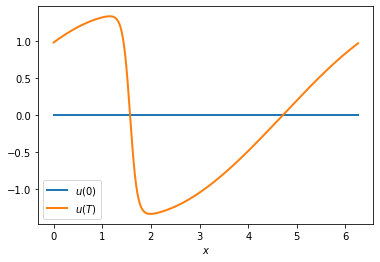

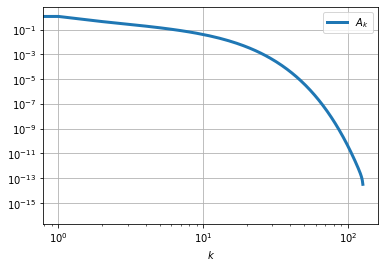

In [38]:
L = 2*np.pi # length of the domain
N=256 # number of points used to discretize the domain
nu = 1e-1 # viscosity
dt = 0.01 # time step
T = 20. # duration the simulation
Tsample = 0.2 # sampling period
A = 0.
k = 8.
phi = 0

x,kx,dx = init_domain(N,L)
""" This is where you input your forrcing """
f = (1/2)*np.cos(x)
# f = np.zeros_like(x)

""" Initial condition"""
u0 = A*np.cos(k*x + phi)


u,tprobe,uprobe,urms,Prod,Diff,epsilon,Work = \
    time_advancement_advection_diffusion(u0,nu,T,dt,kx,dx,f,Tsample)
plt.figure()
plt.plot(x,u0,lw = 2,label="$u(0)$")
plt.plot(x,u,lw = 2,label="$u(T)$")
plt.legend()
plt.xlabel("$x$")
plt.show()

Fu = np.fft.fft(u)/(N//2)
Ak = np.sqrt(np.real(Fu[0:N//2])**2+np.imag(Fu[0:N//2])**2)
plt.loglog(kx[0:N//2],Ak,lw=3,label="$A_k$")
plt.xlabel("$k$")
plt.grid(True)
plt.legend()
plt.show()

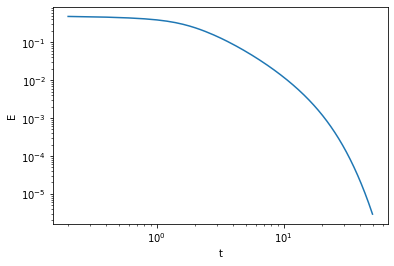

In [35]:
E = np.power(urms,2)
plt.loglog(tprobe[:],E[:])
plt.xlabel(r"t")
plt.ylabel(r"E")
# plt.xlim(1,60)
# plt.ylim(1,1e3)
plt.show()

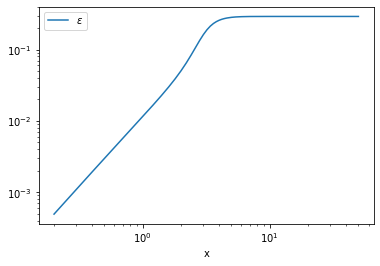

In [9]:
# plt.loglog(tprobe,Prod,label=r"$\mathcal{P}$")
# plt.loglog(tprobe,Diff,label=r"$\mathcal{D}$")
plt.loglog(tprobe,epsilon,label=r"$\varepsilon$")
# plt.plot(tprobe,Work,label=r"$\mathcal{W}$")
plt.xlabel(r"x")
plt.legend()
plt.show()

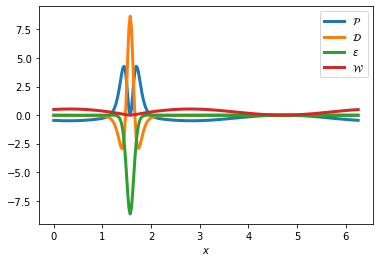

In [10]:
E = np.power(u,2)/2
plt.plot(x,-u*der_x(E,kx),lw = 3,label=r"$\mathcal{P}$")
plt.plot(x,nu*dder_x(E,kx), lw = 3, label=r"$\mathcal{D}$")
plt.plot(x,-nu*np.power(der_x(u,kx),2), lw = 3,label=r"$\varepsilon$")
plt.plot(x,u*f, lw = 3, label=r"$\mathcal{W}$")
plt.legend()
plt.xlabel(r"$x$")
plt.show()

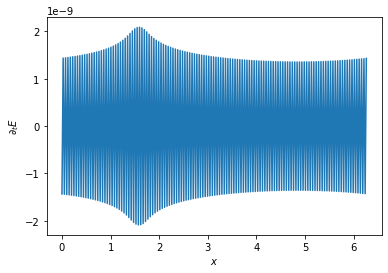

In [11]:
plt.plot(x,-u*der_x(E,kx)+nu*dder_x(E,kx)-nu*np.power(der_x(u,kx),2)+u*f)
plt.xlabel("$x$")
plt.ylabel("$\partial_t E$")
plt.show()